 <h1 color='black'>Data Preprocessing<h1>

In [1]:
# importing required libraries
import pandas as pd
import numpy as np

import time
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (StackingClassifier, VotingClassifier, RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
# importing dataset
data_train = pd.read_csv("KDDTrain+.txt")
data_test = pd.read_csv("KDDTest+.txt")
data_test

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [3]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

data_train.columns = col_names
data_test.columns = col_names

data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


<h1 color='black'>Data Normalization<h1>

In [4]:
# selecting numeric attributes columns from data
numeric_col = data_train.select_dtypes(include='number').columns
numeric_col

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'difficulty_level'],
      dtype='object')

In [5]:
# using standard scaler for normalizing

std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [6]:
# data before normalization
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
# data after normalization
data_train = normalization(data_train.copy(),numeric_col)
data_test = normalization(data_test.copy(),numeric_col)
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,-0.11025,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-1.161035,2.736839,2.367729,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,normal,-1.965547
1,-0.11025,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-0.938292,-0.174419,-0.480194,-0.289105,1.608750,1.618946,-0.387635,-0.376389,neptune,-0.219968
2,-0.11025,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,...,1.066393,-0.439079,-0.383106,0.066249,-0.572087,-0.602436,-0.387635,-0.345086,normal,0.652822
3,-0.11025,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,...,1.066393,-0.439079,-0.480194,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,normal,0.652822
4,-0.11025,tcp,private,REJ,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,...,-1.005115,-0.068555,-0.480194,-0.289105,-0.639535,-0.624874,2.874397,2.753901,neptune,0.652822


<h1 color='black'>One-hot-encoding<h1>

In [8]:

df_train = data_train.copy()
df_test = data_test.copy()

le = LabelEncoder()

df_train['protocol_type'] = le.fit_transform(df_train['protocol_type'])
df_test['protocol_type'] = le.transform(df_test['protocol_type'])
df_train['service'] = le.fit_transform(df_train['service'])
df_test['service'] =le.transform(df_test['service'])
df_train['flag'] = le.fit_transform(df_train['flag'])
df_test['flag'] = le.transform(df_test['flag'])

df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,-0.155538,1,49,1,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,-1.397261,-0.138373,-0.431868,-0.229986,-0.358127,-0.352758,1.980007,1.929318,neptune,0.698348
1,-0.154116,1,20,9,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,0.002876,-0.228987,1.559859,0.004223,-0.358127,-0.352758,-0.602670,-0.565432,normal,0.698348
2,-0.155538,0,14,9,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,...,0.898046,-0.410214,2.833257,3.048941,-0.358127,-0.352758,-0.602670,-0.565432,saint,-0.706700
3,-0.154827,1,60,2,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,...,-0.685716,0.360004,-0.333914,0.004223,-0.358127,-0.352758,1.540952,1.205841,mscan,-1.643399
4,-0.155538,1,24,9,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,...,0.898046,-0.410214,-0.399216,0.121328,-0.321515,-0.352758,-0.602670,-0.565432,normal,0.698348


<h1 color='black'>Binary Classification<h1>

In [9]:
label1 = []
def changeLabel_train(df):
    for i in df.label:
        if i=='normal':
            label1.append(1)
        else:
            label1.append(0)
            
changeLabel_train(df_train)
df_train['label'] = label1

label2 = []
def changeLabel_test(df):
    for i in df.label:
        if i=='normal':
            label2.append(1)
        else:
            label2.append(0)
            
changeLabel_test(df_test)
df_test['label'] = label2

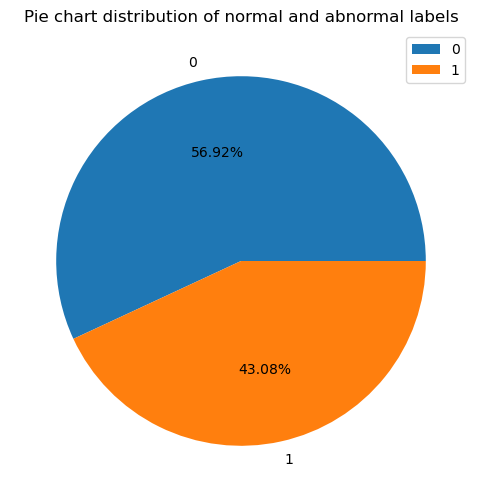

In [10]:
# pie chart distribution of normal and abnormal labels
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(df_test.label.value_counts(),labels=df_test.label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

<h1 color='black'>Train-Test Split<h1>

In [11]:
y_train = df_train['label'].ravel()
y_test = df_test['label'].ravel()

df_train.drop(['label'], axis=1, inplace=True)
df_test.drop(['label'], axis=1, inplace=True)

X_train = df_train.copy()
X_test = df_test.copy()

results = pd.DataFrame(columns = ['S.no', 'Model', 'Execution Time', 'Accuracy', 'F1-score', 'Precision', 
                                  'Recall', 'MCC', 'ROC', 'Kappa', 'Mean Absolute Error', 'Root Mean Squared Error', 'Relative Absolute Error', 'Root Relative Squared Error'])
num = 0

<h1 color='black'>Algorithm Report <h1>

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report, matthews_corrcoef, roc_auc_score, cohen_kappa_score, precision_score, mean_absolute_error, mean_squared_error 

def get_report(actual, pred, model, t):
    global num, results
    print("Confusion matrix: \n", confusion_matrix(actual, pred))
    accuracy = accuracy_score(actual, pred)
    print("Accuracy: ", accuracy)
    fscore = f1_score(actual, pred)
    print("F1 Score: ", fscore)
    precision = precision_score(actual, pred)
    print("Precision Score: ", precision)
    recall = recall_score(actual, pred)
    print("Recall Score: ", recall)
    mcc = matthews_corrcoef(actual, pred)
    print("MCC: ", mcc)
    roc = roc_auc_score(actual, pred, multi_class='ovr')
    print("ROC: ", roc)
    kappa = cohen_kappa_score(actual, pred)
    print("Kappa: ", kappa)
    mae = mean_absolute_error(actual, pred)
    print("Mean absolute error: ", mae)
    rmse = mean_squared_error(actual, pred, squared=False)
    print("Root Mean Squared Error: ", rmse)
    rae = sum(np.absolute(np.array(pred) - np.array(actual))) / sum(np.absolute(np.array(actual) - np.mean(np.array(y_train))))
    print("Relative Absolute Error: ", rae)
    rrse = math.sqrt(sum((np.array(actual) - np.array(pred))**2) / sum((np.array(actual) - np.mean(np.array(actual)))**2))
    print("Root Relative Squared Error: ", rrse)
    print("\n")
    print("="*60)
    print("\n")
    num += 1
    results = results.append({'S.no': num, 'Model': model, 'Execution Time': t, 
                              'Accuracy': accuracy, 'F1-score': fscore, 'Precision': precision, 
                              'Recall': recall, 'MCC': mcc, 'ROC': roc, 'Kappa': kappa, 
                              'Mean Absolute Error': mae, 'Root Mean Squared Error': rmse, 
                              'Root Absolute Error': rae, 'Root Relative Squared Error': rrse}, ignore_index=True)

In [13]:
models = [ 
    ('Naive Bayes', BernoulliNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=9, weights = "distance")),
    ('Decision Tree', tree.DecisionTreeClassifier(random_state = 0, max_depth = 8, criterion = "entropy")),
    ('Logistic Regression', LogisticRegression(C = 0.001, max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_jobs = -1, n_estimators = 500, warm_start = True, max_depth = 6, min_samples_leaf = 2, max_features = 'sqrt', verbose = 0))
]

In [14]:
def predict_values(model, clf):
    print('\033[1m' + model + '\033[0m')
    start = time.process_time()
    clf.fit(X_train, y_train)
    t = time.process_time() - start
    print("Execution time: ", t)
    predicted = clf.predict(X_test)
    get_report(y_test, predicted, model, t)

In [15]:
for model, clf in models:
    predict_values(model, clf)

Naive Bayes
Execution time:  0.171875
Confusion matrix: 
 [[8049 4783]
 [ 335 9376]]
Accuracy:  0.7729672182052079
F1 Score:  0.7855886049434436
Precision Score:  0.6621936577441909
Recall Score:  0.9655030377921944
MCC:  0.6073210351648599
ROC:  0.7963815064272692
Kappa:  0.5614870976075161
Mean absolute error:  0.22703278179479217
Root Mean Squared Error:  0.4764795712250339
Relative Absolute Error:  0.4497592465469885
Root Relative Squared Error:  0.9622254596229799




KNN
Execution time:  0.125
Confusion matrix: 
 [[8279 4553]
 [ 694 9017]]
Accuracy:  0.7672448210087388
F1 Score:  0.7746230832008935
Precision Score:  0.6644804716285925
Recall Score:  0.9285346514262177
MCC:  0.5803891694510686
ROC:  0.7868592833190939
Kappa:  0.5472711764874225
Mean absolute error:  0.23275517899126114
Root Mean Squared Error:  0.482447073772099
Relative Absolute Error:  0.4610954995373288
Root Relative Squared Error:  0.9742765174813222




Decision Tree
Execution time:  0.40625
Confusion matrix:

In [16]:
for i in range(3):
    for j in range(i+1, 4):
        for k in range(j+1, 5):
            clf = VotingClassifier([models[i], models[j], models[k]], voting='soft')
            predict_values("Soft Voting Ensemble learning with models: " + models[i][0] + ", " + models[j][0] + ", " + models[k][0], clf)


Soft Voting Ensemble learning with models: Naive Bayes, KNN, Decision Tree
Execution time:  1.125
Confusion matrix: 
 [[8289 4543]
 [ 299 9412]]
Accuracy:  0.78521048662556
F1 Score:  0.795402687399645
Precision Score:  0.6744536008599068
Recall Score:  0.9692101740294511
MCC:  0.6272862330471796
ROC:  0.8075866954935286
Kappa:  0.5841285610713064
Mean absolute error:  0.21478951337443997
Root Mean Squared Error:  0.4634538956298026
Relative Absolute Error:  0.42550493782346976
Root Relative Squared Error:  0.9359207921336746




Soft Voting Ensemble learning with models: Naive Bayes, KNN, Logistic Regression
Execution time:  7.890625
Confusion matrix: 
 [[8460 4372]
 [ 677 9034]]
Accuracy:  0.7760280353102958
F1 Score:  0.7815893065709218
Precision Score:  0.6738773683425332
Recall Score:  0.9302852435382556
MCC:  0.5946568676571977
ROC:  0.7947872601731178
Kappa:  0.5635001432895688
Mean absolute error:  0.22397196468970412
Root Mean Squared Error:  0.4732567640189669
Relative Absolu

In [17]:
for i in range(3):
    for j in range(i+1, 4):
        for k in range(j+1, 5):
            clf = VotingClassifier([models[i], models[j], models[k]], voting='hard')
            predict_values("Hard Voting Ensemble learning with models: " + models[i][0] + ", " + models[j][0] + ", " + models[k][0], clf)


Hard Voting Ensemble learning with models: Naive Bayes, KNN, Decision Tree
Execution time:  1.125
Confusion matrix: 
 [[8288 4544]
 [ 298 9413]]
Accuracy:  0.78521048662556
F1 Score:  0.7954199763393611
Precision Score:  0.6744286021351293
Recall Score:  0.9693131500360416
MCC:  0.627339877071094
ROC:  0.8075992184095421
Kappa:  0.5841384510448562
Mean absolute error:  0.21478951337443997
Root Mean Squared Error:  0.4634538956298026
Relative Absolute Error:  0.42550493782346976
Root Relative Squared Error:  0.9359207921336746




Hard Voting Ensemble learning with models: Naive Bayes, KNN, Logistic Regression
Execution time:  6.453125
Confusion matrix: 
 [[8515 4317]
 [ 682 9029]]
Accuracy:  0.7782460187197799
F1 Score:  0.7831894869237108
Precision Score:  0.6765322943203956
Recall Score:  0.9297703635053033
MCC:  0.5978446835171969
ROC:  0.7966728999571403
Kappa:  0.5675121911295464
Mean absolute error:  0.22175398128022003
Root Mean Squared Error:  0.47090761437910517
Relative Absol

In [18]:
results.to_csv('results2.csv', index=False)